# Real-Estate Data Integration and Data Reshaping

Environment: Python 3.7 and Jupyter notebook

Libraries used:

- zipfile (for operations of zip files, included in Python 3.7)
- os (for os operation, included in Python 3.7)
- shapely (for use `Polygon`, included in Anaconda 3.7)
- geopandas (for extracting values in shp files, included in Anaconda 3.7)
- matplotlib (for visualization, included in Anaconda 3.7)
- shapely (for dealing with shp data, included in Anaconda 3.7)
- pandas (for dataframe, included in Anaconda 3.7) 
- multiprocessing (for using `Pool` to boost the speed of processing in MacOS and Linux, included in Python 3.7)
- platform (for recognizing the operating system of user's, included in Python 3.7)
- functools (for `reduce()` to reduce process, included in Python 3.7)
- itertools (for `groupby()` to implement `reduce_by_key()`, included in Python 3.7)
- math (for radians, cos, sin, asin, sqrt and log functions, included in Python 3.7)
- statistics (for `mean()` function, included in Python 3.7)
- datetime (for datetime manipulation, included in Python 3.7)
- tqdm (for progress bar to visualize the progress, included in Anaconda 3.7)
- yaml (for parsing yaml format data, included in Anaconda 3.7)
- urllib (for download a given URL as http file, included in Anaconda 3.7)
- requests (for download a given URL as http file, included in Anaconda 3.7)
- bs4 (for `BeautifulSoup` to parse http and xml format data, included in Anaconda 3.7)
- re (for deleting tag, included in Python 3.7)
- sklearn (for fitting linear model and transformations, included in Anaconda 3.7)
- seaborn (for statistic visualization, included in Anaconda 3.7)
- scipy (for `norm()` to fit normal distribution, included in Anaconda 3.7)

# 1. Introduction
This project is aim to integrate several datasets into one single schema and find and fix possible problems in the data.
1. TASK 1
   - **Data integration**: the data below will be integrated,

        ID, Address, Suburb, Price, Type, 
        Date, Rooms, Bathroom, Car, Landsize, 
        Age, Lattitude, Longtitude, train_station_id, 
        distance_to_train_station, travel_min_to_CBD, 
        over_priced?, crime_A_average, crime_B_average, 
        crime_C_average, closest_primary_school, distance_to_closest_primary, 
        primary_school_ranking,closest_secondary_school, 
        distance_to_closest_secondary, secondary_school_ranking.
        

2. TASK 2
   - **Data reshaping**: the attributes below will be transformed for reshaping,
   
       Rooms, crime_C_average, travel_min_to_CBD, and property_age attributes
   

# 2. Import libraries

In [2]:
# windows users should use conda for geopandas
# !conda install geopandas

# for macOS and linux
# !pip install geopandas


# !pip install shapely
# !pip install descartes
# !pip install haversine
# !pip install pandas
# !pip install seaborn
# !pip install tqdm
# !pip install requests
# !pip install bs4
# !pip install sklearn
# !pip install scipy
# !pip install pyyaml
# !pip install openpyxl
# !pip install lxml

In [1]:
import zipfile
import os
import matplotlib.pyplot as plt 
import shapely
import geopandas
from shapely.geometry import Point
import pandas as pd
from multiprocessing import Pool
import platform
from functools import reduce
from itertools import groupby
from math import radians, cos, sin, asin, sqrt, log
from statistics import mean
import datetime
from tqdm.auto import tqdm
import yaml
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import norm

In [117]:
import warnings
warnings.filterwarnings("ignore")

# 3. Task 1 Integrate data

## 3.1 Suburb

The data for suburbs is stored in `vic_suburb_boundary.zip`. Use zipfile libarary to examine the files name list in the zip file.

In [2]:
boundary_zip = zipfile.ZipFile('vic_suburb_boundary.zip', 'r')
boundary_zip_list = boundary_zip.namelist()
boundary_zip_list

['VIC_LOCALITY_POLYGON_shp.dbf',
 'VIC_LOCALITY_POLYGON_shp.prj',
 'VIC_LOCALITY_POLYGON_shp.shp',
 'VIC_LOCALITY_POLYGON_shp.shx']

They are shp files. As the 4 shp files are needed to be read in a same path, they need to be unzipped.

In [3]:
# unzip vic_suburb_boundary.zip
path = "vic_suburb_boundary"

# if the file is already unzipped, skip
if not os.path.exists(path):
    boundary_zip.extractall(path=path)
    boundary_zip.close()

Use `geopandas` to extract the data from shp files. (GeoPython, 2019)

The result which is a data frame is stores in the variable `shape_df`.

In [4]:
# load shp files
shape_df = geopandas.GeoDataFrame.from_file(os.path.join("vic_suburb_boundary", "VIC_LOCALITY_POLYGON_shp.shp"))
shape_df

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,"POLYGON ((144.86382 -37.67087, 144.86405 -37.6..."
2969,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,"POLYGON ((144.80217 -37.66167, 144.80243 -37.6..."
2970,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,"POLYGON ((145.19211 -38.39105, 145.19392 -38.3..."
2971,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,"POLYGON ((145.21831 -38.38722, 145.21863 -38.3..."


Find out the type of the values in  `geometry` column.

In [5]:
type(shape_df.geometry[0])

shapely.geometry.polygon.Polygon

They are `Polygon` type in `shapely` library. Visualize the shapes to examine the data.

<AxesSubplot:>

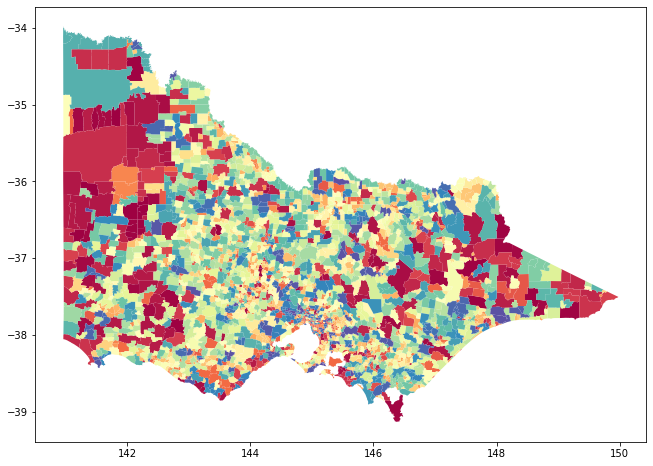

In [6]:
shape_df.plot(cmap='Spectral', figsize=(16,8))

Then, load the csv file `data.csv` to match locations to suburb for each property.

In [7]:
data = pd.read_csv("data.csv")
data

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,-37.86528,145.11775
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,-37.76370,144.96620
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,-37.79150,145.03480
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,-37.70695,144.88514
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,-37.91855,145.02628
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,-37.78930,144.93300
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,-37.81519,145.03153
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,-37.73860,145.04410
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,-37.69852,145.04836


### 3.1.1 Creating SuburbFinder class

We need to find the point is in which suburb, so `Point.within()` is used to find out which suburb the properties are located (Python GIS, 2019).

In [8]:
class SuburbFinder:
    def __init__(self, row):
        self.row = row
        # set default value
        self.suburb = "not available"
        # assemble the Point by lat lon values
        self.point = self._assemble_point()
        self._find_suburb()
    
    def _assemble_point(self) -> Point:
        # this method is to build a Point by the latitude and longitude
        lat = self.row["Lattitude"]
        lon = self.row["Longtitude"]
        return Point(lon, lat)
    
    def _find_suburb(self):
        # find the suburb in which suburb Polygon
        for _, suburb in shape_df.iterrows():
            if self.point.within(suburb.geometry):
                self.suburb = suburb.VIC_LOCA_2
                break
        return self

#### Apply the methods to an example to check its usability.

In [9]:
eg = data.iloc[0, :]
SuburbFinder(eg).suburb

'MOUNT WAVERLEY'

Seems successful. Then, apply the functions to all properties to find the suburbs belonged to.

### 3.1.2 Finding all properties suburb

In [10]:
# Time consuming
def search_suburb(row):
    return SuburbFinder(row).suburb


rows = [row for (_, row) in data.iterrows()]
is_unix = platform.system() in ("Darwin", "Linux")

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    # increase the opening files limitation in unix-like system
    !ulimit -n 4096
    p = Pool()
    # apply the function to get body_rows from given file name
    data["Suburb"] = list(p.map(search_suburb, tqdm(rows)))
    p.close()
else:
    data["Suburb"] = list(map(search_suburb, tqdm(rows)))

data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,-37.86528,145.11775,MOUNT WAVERLEY
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,-37.76370,144.96620,BRUNSWICK
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,-37.79150,145.03480,KEW
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,-37.70695,144.88514,TULLAMARINE
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,-37.91855,145.02628,BENTLEIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,-37.78930,144.93300,KENSINGTON
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,-37.81519,145.03153,HAWTHORN
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,-37.73860,145.04410,HEIDELBERG WEST
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,-37.69852,145.04836,BUNDOORA


In [11]:
data.Suburb.to_list().count("not available")

0

From the output, all properties have found related suburb successfully.

## 3.2 Train_station

From the specification pdf, all data related to the train station is stored in the `gtfs.zip`.
First of all, examine the files inside the `gtfs.zip`.

In [12]:
# read file
gtfs_zip = zipfile.ZipFile('gtfs.zip', 'r')
# show files' name in the zip file
gtfs_zip_list = gtfs_zip.namelist()
gtfs_zip_list


['1/',
 '10/',
 '10/google_transit.zip',
 '11/',
 '11/google_transit.zip',
 '1/google_transit.zip',
 '2/',
 '2/google_transit.zip',
 '3/',
 '3/google_transit.zip',
 '4/',
 '4/google_transit.zip',
 '5/',
 '5/google_transit.zip',
 '6/',
 '6/google_transit.zip',
 '7/',
 '7/google_transit.zip',
 '8/',
 '8/google_transit.zip']

Unzip all zip files inside the `gtfs.zip`.

In [13]:
# unzip gtfs.zip
path = "gtfs"
directories = ("1", "2", "3", "4", "5", "6", "7", "8", "10", "11")
if not os.path.exists(path):
    gtfs_zip.extractall(path=path)
    # unzip the zip files inside
    for n in directories:
        zip_path = os.path.join(path, str(n), "google_transit.zip")
        inner_zip = zipfile.ZipFile(zip_path, 'r')
        inner_zip.extractall(os.path.join(path, str(n)))
    inner_zip.close()
gtfs_zip.close()

The gtfs is the data structure contains the transport data (Google, 2019). There are several txt files inside, and each of the files contains the different and related csv format dataset.

Each txt file contains the value below,
 - agency.txt: 
     - Columns: agency_id, agency_name, agency_url, agency_timezone, agency_lang
     - The `agency.txt` contains the data about the agency information. In this dataset, the agency is PTV.
 - calendar_dates.txt:
     - Columns: service_id, date, exception_type
     - This file contains the dates of services
 - calendar.txt:
     - Columns: service_id, monday, tuesday, wednesday, thursday, friday, saturday, sunday, start_date, end_date
     - This file contains the service types and their working days
 - routes.txt:
     - Columns: route_id, agency_id, route_short_name, route_long_name, route_type, route_color, route_text_color
     - This file has the data about the routes and its short name, route color and route type.
 - shapes.txt:
     - Columns: shape_id, shape_pt_lat, shape_pt_lon, shape_pt_sequence, shape_dist_traveled
     - This file has the shapes to visualize the transport map
 - stop_times.txt
     - Columns: trip_id, arrival_time, departure_time, stop_id, stop_sequence, stop_headsign, pickup_type, drop_off_type, shape_dist_traveled
     - This file has the timetable for each trip and each stop
 - stops.txt
     - Columns: stop_id, stop_name, stop_lat, stop_lon
     - This file has the details information of stops
 - trips.txt
     - Columns: route_id, service_id, trip_id, shape_id, trip_headsign, direction_id
     - This file contains the data of the route information and the trips involved

From the dataset, it has the similar structure of the dataset stored in a relational database. Therefore, loading the tables needed and finding the relationship between these tables are the key methods to integrale the data.

These seperate directories from `gtfs/1` to `gtfs/11` contain the data which are all needed. For further processings, merge them together first.

In [14]:
stop_data = pd.read_csv(os.path.join(path, "1", "stops.txt"))
stop_data.shape

(109, 4)

### 3.2.1 Stop Information

Define a function `merge_data()` for merging all files with same type as a pandas data frame.

Then, apply the function to merge data in all `stops.txt` into the variable `stop_data`.

In [15]:
def merge_data(file_name):
    # read first file
    df = pd.read_csv(os.path.join(path, "1", file_name))
    # merge other files
    for n in directories[1:]:
        df = pd.concat([df, pd.read_csv(os.path.join(path, str(n), file_name))], ignore_index=True)
    return df

stop_data = merge_data("stops.txt").drop_duplicates()

All of stop information are shown below

In [16]:
stop_data

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
...,...,...,...,...
28198,20614,Bordertown Railway Station (Bordertown (SA)),-36.308607,140.773885
28203,23173,Skybus Coach Terminal/Spencer St (Melbourne City),-37.816483,144.952815
28204,45511,Melbourne Airport T1 Skybus/Arrival Dr (Melbou...,-37.669352,144.850805
28205,45513,Melbourne Airport T3 Skybus/Arrival Dr (Melbou...,-37.671262,144.848823


The stop_data extracted from `stop.txt` have these columns below:
 1. stop_id
 2. stop_name
 3. stop_lat: stop's latitude
 4. stop_lon: stop's longitude
 
The **Southern Cross Railway Station** is considered as the destination. Therefore, the information of this train station need to be found.

In [17]:
cbd_stop_ids = []
for row in stop_data.values:
    # if the stop_name contains the station name, it can be
    # considered as the target station needed
    if row[1].count("Southern Cross Railway Station"):
        cbd_stop_ids.append(row[0])

cbd_stop_ids = set(cbd_stop_ids)
cbd_stop_ids

{18187, 18194, 20043, 22180}

These 4 stop id above are belonging to the Southern Cross Railway Station.

In [18]:
stop_data[stop_data["stop_id"].isin(cbd_stop_ids)]

,stop_id,stop_name,stop_lat,stop_lon
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
319,22180,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411
639,18187,122-Southern Cross Railway Station/Spencer St ...,-37.818801,144.953966
643,18194,122-Southern Cross Railway Station/Spencer St ...,-37.818776,144.954069


From the data frame output, the Southern Cross Railway Station has 4 distinguished stop names. The 20043 and 22180 are in the similar location (latitude and longitude), and the 18187 and 18194 are similar as well. Therefore, these stop id all can be considered as the stop id of Southern Cross Train Station. So, assign these data into the `cbd_stop_ids` to future use.

### 3.2.2 Finding all trips to Southern Cross

To get the information for the trips and the stop times in each stop, the `stop_times.txt` need to be read.

In [19]:
stop_times_data = merge_data("stop_times.txt")
stop_times_data

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301
...,...,...,...,...,...,...,...,...,...
4467590,5821.T0.11-SKY-mjp-1.2.R,24:05:00,24:05:00,45511,4,NaN,0,0,330.382187
4467591,5822.T0.11-SKY-mjp-1.2.R,24:00:00,24:00:00,23173,1,NaN,0,0,NaN
4467592,5822.T0.11-SKY-mjp-1.2.R,24:19:52,24:19:52,48578,2,NaN,0,0,NaN
4467593,5822.T0.11-SKY-mjp-1.2.R,24:20:00,24:20:00,45513,3,NaN,0,0,0.000000


Therefore, the `stop_times.txt` contains the columns below:
 1. trip_id
 2. arrival_time: Arrival time of the trip in specific station
 3. departure_time: Departure time of the trip in specific station
 4. stop_id
 5. stop_sequence: The order of the trip stopping in each station

Find all trips can directly to the Southern Cross Railway Station.

In [20]:
trips = stop_times_data[stop_times_data.stop_id.isin(cbd_stop_ids)].trip_id
trips

15          7548.UR.1-V08-A-mjp-1.1.H
30          7549.UR.1-V08-A-mjp-1.2.H
45          7550.UR.1-V08-A-mjp-1.2.H
46          7779.UR.1-V08-A-mjp-1.3.R
61          7780.UR.1-V08-A-mjp-1.4.R
                      ...            
4463550    5570.T0.10-GSR-K-mjp-1.2.R
4463560    6993.UW.10-GSR-K-mjp-1.2.R
4463561    7833.T0.10-GSR-L-mjp-1.1.H
4463571    7834.T2.10-GSR-L-mjp-1.1.H
4463590    7245.T0.10-GSR-L-mjp-1.2.R
Name: trip_id, Length: 19623, dtype: object

#### 3.2.2.1 Get all train trips to Southern Cross

To examine if the trip is belongs to train routes, extract the routes data from `routes.txt` to see.

This data contains the columns below:
 1. route_id
 2. agency_id
 3. route_short_name
 4. route_long_name
 5. route_type
 6. route_color
 7. route_test_color

To determine the trips belongs to train trips. The `route_id` and `route_type` are important features.

In [21]:
routes_data = merge_data("routes.txt")
routes_data

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,1-V08-A-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
1,1-V08-B-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
2,1-V08-C-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
3,1-V08-D-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
4,1-V08-E-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
...,...,...,...,...,...,...,...
1660,10-GSR-I-mjp-1,NaN,Overland,Melbourne - Adelaide,2,0,FFFFFF
1661,10-GSR-J-mjp-1,NaN,Overland,Melbourne - Adelaide,2,0,FFFFFF
1662,10-GSR-K-mjp-1,NaN,Overland,Melbourne - Adelaide,2,0,FFFFFF
1663,10-GSR-L-mjp-1,NaN,Overland,Melbourne - Adelaide,2,0,FFFFFF


Define a function `reduce_by_key()` for further usages. Apply the function to count the distribution of route types.

In [22]:
def reduce_by_key(func, iterable):
    return map(
        lambda x: (x[0], reduce(func, map(lambda e: e[1], x[1]))),
        groupby(sorted(iterable, key=lambda e: e[0]), lambda e: e[0])
    )

list(reduce_by_key(lambda x, y: x+y, map(lambda x: (x, 1), routes_data.route_type)))

[(0, 24), (2, 296), (3, 1345)]

From Google (2019), the relationship between the `route_type` and the type of transport is:

0 -> Tram

2 -> Train

3 -> Bus

Therefor, filter all train routes by `route_type` equals to $2$.

In [23]:
train_routes_data = routes_data[routes_data.route_type == 2]
train_routes = train_routes_data.route_id
train_routes

0        1-V08-A-mjp-1
1        1-V08-B-mjp-1
2        1-V08-C-mjp-1
3        1-V08-D-mjp-1
4        1-V08-E-mjp-1
             ...      
1659    10-GSR-H-mjp-1
1660    10-GSR-I-mjp-1
1661    10-GSR-J-mjp-1
1662    10-GSR-K-mjp-1
1663    10-GSR-L-mjp-1
Name: route_id, Length: 296, dtype: object

Use `trips.txt` to find if the trip is belongs to the train routes.

In [24]:
trips_data = merge_data("trips.txt")
trips_data

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1
...,...,...,...,...,...,...
131540,11-SKY-mjp-1,UW,2748.UW.11-SKY-mjp-1.2.R,11-SKY-mjp-1.2.R,Melbourne Airport,1
131541,11-SKY-mjp-1,UW,2749.UW.11-SKY-mjp-1.2.R,11-SKY-mjp-1.2.R,Melbourne Airport,1
131542,11-SKY-mjp-1,UW,2750.UW.11-SKY-mjp-1.2.R,11-SKY-mjp-1.2.R,Melbourne Airport,1
131543,11-SKY-mjp-1,UW,2751.UW.11-SKY-mjp-1.2.R,11-SKY-mjp-1.2.R,Melbourne Airport,1


The `trips.txt` has these columns below:
 1. route_id
 2. service_id
 3. trip_id
 4. shape_id
 5. trip_headsign: the direction of the trips
 6. direction_id: the direction id is to show the direction of the trip
 
The `trips.txt` describes the details for each trip, and the routes of the trips belong to.

To get all train trips, all train trips can be filter by the `train_routes` found in previous, which are train routes. The `trips_data` is the bridge of trips and routes. Therefore, the train trips can be found below.

In [25]:
train_trips = set(trips_data[trips_data.route_id.isin(train_routes)].trip_id)
len(train_trips)

32377

`trips`: All trips can directly go to Southern Cross Railway Station

`train_trips`: All trips belongs to train, not bus or tram

Therefore, using `Set.intersection()` to find the trips can fit these 2 requirements.

In [26]:
direct_train_trips = train_trips.intersection(set(trips))
len(direct_train_trips)

18718

From the trips found in the last chunk, find all stops belongs to these trips by using the `stop_times_data`.

In [27]:
direct_train_stop_times_data = stop_times_data[stop_times_data.trip_id.isin(direct_train_trips)]
direct_train_stop_times_data

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301
...,...,...,...,...,...,...,...,...,...
4463586,7245.T0.10-GSR-L-mjp-1.2.R,14:15:00,14:17:00,20618,12,NaN,0,0,111551.941266
4463587,7245.T0.10-GSR-L-mjp-1.2.R,15:09:00,15:11:00,45918,13,NaN,0,0,197869.508732
4463588,7245.T0.10-GSR-L-mjp-1.2.R,15:33:00,15:35:00,20288,14,NaN,0,0,228350.073842
4463589,7245.T0.10-GSR-L-mjp-1.2.R,17:37:00,17:39:00,20335,16,NaN,1,0,406968.488602


#### 3.2.2.2 Filter the stops have train trips in weekdays

To filter the stops with the constraint, the trips operating in all 5 weekdays should be found.

To find which days are in service for each trip, the `calendar.txt` is important. Therefore, read the `calendar.txt` into a data frame.

In [28]:
calendar_data = merge_data("calendar.txt").drop_duplicates()
calendar_data

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513
...,...,...,...,...,...,...,...,...,...,...
332,T2_6,0,0,0,0,0,1,0,20190511,20190511
338,T0+a6_3,0,0,0,0,1,0,0,20190509,20190810
343,UJ_1,0,0,0,0,0,0,1,20190509,20190810
345,T2_2,0,0,0,0,0,1,0,20190509,20190810


From the output, the `calendar.txt` contains the columns `service_id`: this can be used to find the trip_id in the `trips.txt`. Using the `trip_id` to filter and get the stop times which meet this requirement.

Given the constrain for the trips should operate in all weekdays, all the value of `monday` to `friday` should be $1$.

In [29]:
weekday_services = calendar_data[calendar_data.monday 
                                 + calendar_data.tuesday 
                                 + calendar_data.wednesday 
                                 + calendar_data.thursday 
                                 + calendar_data.friday == 5].service_id
weekday_services

6         T0
13      T0_1
16      T0_2
20      T0_3
51        T0
76        T0
81      T0_1
84      T0_2
89      T0_3
90      T0_4
93      T0_5
95      T0_6
100     T0_7
101     T0_8
102     T0_9
103    T0_10
104    T0_11
108    T0_12
110    T0_13
111    T0_14
116    T0_15
119    T0_16
123    T0_17
124    T0_18
125    T0_19
126    T0_20
135    T0_21
139    T0_22
140    T0_23
141    T0_24
145    T0_25
149    T0_26
153    T0_27
270     T0_1
272     T0_2
278     T0_3
287     T0_4
307     T0_7
314     T0_8
317     T0_9
320    T0_10
Name: service_id, dtype: object

These are all service id operating in all 5 weekdays. Use the service id in variable `weekday_serivce` to filter the trips in the variable `trip_data` fitting the requirement.

In [30]:
weekday_trips = trips_data[trips_data.service_id.isin(weekday_services)].trip_id
weekday_trips.head()

0    1051.T0.1-V08-G-mjp-1.1.H
1    1052.T0.1-V08-G-mjp-1.2.H
2    1053.T0.1-V08-G-mjp-1.2.H
3    1522.T0.1-V08-G-mjp-1.4.R
4    1523.T0.1-V08-G-mjp-1.5.R
Name: trip_id, dtype: object

Filter all `stop_times` data with these trips operating in weekdays.

Then, find the all stops in these trips.

In [31]:
filtered_stop_times_data = direct_train_stop_times_data[direct_train_stop_times_data.trip_id.isin(weekday_trips)]

The data in the variable `filtered_stop_times_data` meet the requirements
 - The trips will stop in the Southern Cross Train Station
 - These are train trips
 - The trips operate in all 5 weekdays
 
Therefore, the next step is to get `stop_id` fits these requirements,
 - The departure time is from 7:00 to 9:30 am.
 - There are some trips of this stop can go to the Southern Cross Train Station
 
So, these will be implemented in section 3.2.3

### 3.2.3 Get all stop_id meet the requirements above.

Use `filtered_stop_times_data` rather than whole stop_times data to increase the effiency of the program. Collecting all stop_id meet the requirements above is a preparation for using in the following step (find the nearest station which meet the above requirements).

In [32]:
stop_ids = filtered_stop_times_data.stop_id.drop_duplicates()
stop_ids

578       20291
579       20346
580       20341
581       20339
582       20351
          ...  
525741    19922
525742    19921
539708    19991
539709    19992
539710    19993
Name: stop_id, Length: 312, dtype: int64

Find the detailed stop data with given stop ids in the variable `stop_data`.

In [33]:
filtered_stop_data = stop_data[stop_data.stop_id.isin(stop_ids)].drop_duplicates()
filtered_stop_data

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
...,...,...,...,...
326,46468,Williams Landing Railway Station (Williams Lan...,-37.869865,144.747445
327,52095,Southland Railway Station (Cheltenham),-37.958756,145.049121
328,52159,Middle Gorge Railway Station (South Morang),-37.644061,145.092144
329,52160,Hawkstowe Railway Station (South Morang),-37.622995,145.097396


There are 312 stops fitting the requirements:
 1. has train trips;
 2. has trips containing the Southern Cross Railway Station;
 3. has trips operating in all weekdays.

Then, find the travel minutes to each stops filtered.

### 3.2.4 Finding travel time to CBD for each station

To find the properties' travel times to CBD, the best way is to calculate the times for each station in advance. As there might be many properties have the same nearest train station. It can avoid many calculations to improve the performance of the program. 

The algorithm of finding the travel time for each station is:
 1. Find all trips fitting the requirements set above for the stop
 2. A loop for each trip, 
     1. Determine the departure time of the station selected
     2. Skip if the departure time is not in 7:00 ~ 9:30 am
     3. Get the arrival time of Southern Cross Train Station
     4. If the arrival time is earlier than departure time, it means the trip is come from CBD, so skip
     5. Calculate the travel time by arrival time minus departure time
     6. Collect the travel time for each trips
 3. If there is no trips fitting the requirements, the station is regarded as not available, so skip
 4. Calculate the mean of the travel time collected
    

In [34]:
def to_time(string):
    # this function is used for converting date string to python datetime
    return datetime.datetime.strptime(string, '%H:%M:%S')


class TravelTimeFinder:
    def __init__(self, stop_row):
        self.stop_id = stop_row.stop_id
        self.travel_min_to_CBD = -1
        self.trips = self._find_trips()
        self.travel_min_to_CBD, self.trips_amount = self._find_trip_info()
    
    def _find_trips(self):
        # find the trips belongs to the train station
        trips_df = filtered_stop_times_data[filtered_stop_times_data.stop_id == self.stop_id]
        # filter the departure time in initial stage to decrease the rows for efficiency
        get_is_morning = lambda x: int(x.departure_time[:2]) in (7, 8, 9)
        trips_df = trips_df[trips_df.apply(get_is_morning, axis=1)]
        return trips_df.trip_id
    
    def _get_travel_time(self, trip_id):
        trip_detail_df = filtered_stop_times_data[filtered_stop_times_data.trip_id == trip_id]
        try:
            # get the departure time in the stop selected
            depart_time = to_time(trip_detail_df[trip_detail_df.stop_id == self.stop_id].departure_time.iloc[0])
            # get the arrival time in Southern Cross Railway Station
            arrival_time = to_time(trip_detail_df[trip_detail_df.stop_id.isin(cbd_stop_ids)].arrival_time.iloc[0])
        except ValueError:
            # if the time format has issues, filter it
            return -1
        else:
            # filter the departure time in 7am ~ 9:30am
            if not to_time("07:00:00") <= depart_time <= to_time("09:30:00"):
                return -1

            time_duration = arrival_time - depart_time
            if time_duration.days == -1:
                # if the train is from CBD, skip
                return -1
            else:
                # if the train is to CBD, calculate the travel minute
                minutes = time_duration.seconds / 60
            
            return minutes

    def _find_trip_info(self):
        # calculate the mean of travel time.
        travel_minutes = [self._get_travel_time(trip) for trip in self.trips]
        # filter the data with unavailable situations
        travel_minutes = [each for each in travel_minutes if each != -1]
        if travel_minutes == []:
            return -1, 0
        return mean(travel_minutes), len(travel_minutes)

Apply these methods on an example to check if it works.

In [35]:
eg = filtered_stop_data.iloc[0,]
TravelTimeFinder(eg).travel_min_to_CBD

56.75

From the output, the functions operate successfully. Therefore, apply them to all stops to find related travel time to Southern Cross Station.

#### 3.2.4.1 Caculating the travel time between the each station and Southern Cross Train Station for all stops filtered

In [36]:
# Time consuming
def calculate_travel_min(row):
    finder = TravelTimeFinder(row)
    if finder.trips_amount == 0:
        return None
    return finder.travel_min_to_CBD


rows = [row for (_, row) in filtered_stop_data.iterrows()]

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    filtered_stop_data["travel_min_to_CBD"] = list(p.map(calculate_travel_min, tqdm(rows)))
    p.close()
else:
    filtered_stop_data["travel_min_to_CBD"] = list(map(calculate_travel_min, tqdm(rows)))

filtered_stop_data = filtered_stop_data.dropna()
filtered_stop_data

  0%|          | 0/312 [00:00<?, ?it/s]

,stop_id,stop_name,stop_lat,stop_lon,travel_min_to_CBD
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372,56.750000
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524,39.600000
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631,34.333333
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304,23.909091
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165,39.000000
...,...,...,...,...,...
326,46468,Williams Landing Railway Station (Williams Lan...,-37.869865,144.747445,28.133333
327,52095,Southland Railway Station (Cheltenham),-37.958756,145.049121,42.166667
328,52159,Middle Gorge Railway Station (South Morang),-37.644061,145.092144,51.333333
329,52160,Hawkstowe Railway Station (South Morang),-37.622995,145.097396,54.333333


#### 3.2.4.2 Finding the closest train station which meet the requirements

The stops meet these requirements below are in `filtered_stop_data` dataframe.
1. has trips to Southern Cross Train Station
2. depart between 7:00 and 9:30 am

Calculate the distance by the lattitude and longitude in 2 points. Define the `haversine()` function for calculations (Dunn, Malyutin, Anderson & G, 2019).

In [37]:
def haversine(loc1, loc2):
    lon1, lat1 = loc1
    lon2, lat2 = loc2
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378  # Radius of earth in kilometers.
    return c * r * 1000

Define the class `NearestLocationFinder` to find the most nearest locations (train station, schools). For the explanation of schools, please refer to **3.5.5/3.5.6** .

For the nearest train station, the property will find the station nearest and the distance.

The theory to find the nearest target is:
 1. Collect the source location data
 2. Calculate the distances for all potential targets to the source
 3. Find the minimum distance and its related target

In [38]:
class NearestLocationFinder:
    def __init__(self, row, target_type="station"):
        # set default values
        self.distance = -1
        self.target = -1
        # assemble the location tuple for calculation in haversine
        self.source_loc = (row.Longtitude, row.Lattitude)
        self.target_type = target_type
        self.distance, self.target = self._find_nearest_target()
        
    def _cal_distance(self, destination):
        # this method call the haversine function to calculate the distance
        return haversine(self.source_loc, destination)
    
    def _find_nearest_target(self):
        # this method will return the nearest target by given target type
        if self.target_type == "station":
            return self._find_nearest_train_station()
        else:
            return self._find_nearest_school()
        
    def _find_nearest_train_station(self):
        # for each stop in all stops fits the requirements, calculate each distance to 
        # the property, and the minimum distance means the stop is the nearest one
        for index, stop in filtered_stop_data.iterrows():
            stop_loc = (stop.stop_lon, stop.stop_lat)
            distance = self._cal_distance(stop_loc)
            # if it is the first iteration in the loop, set the minimum value as itself
            if index == 0:
                minimum_distance = distance
                minimum_stop_index = 0
            else:
                if distance < minimum_distance:
                    minimum_stop_index = index
                    minimum_distance = distance
        # return the distance and the station name which will be used
        return minimum_distance, filtered_stop_data.loc[minimum_stop_index,].stop_id
    
    def _find_nearest_school(self):
        # use the similar method to the method of finding nearest train station
        # divide the school type by given target_type values
        if self.target_type == "primary":
            acceptable_type = ["Primary", "Pri/Sec"]
        elif self.target_type == "secondary":
            acceptable_type = ["Secondary", "Pri/Sec"]
            
        school_filtered_data = school_loc_data[school_loc_data.school_type.isin(acceptable_type)]
        # find the minimum distance and related school by iteration in the loop below
        first_iter = True
        for index, school in school_filtered_data.iterrows():
            school_loc = (school.lon, school.lat)
            distance = self._cal_distance(school_loc)
            if first_iter:
                minimum_distance = distance
                minimum_school_index = 0
            else:
                if distance < minimum_distance:
                    minimum_school_index = index
                    minimum_distance = distance
            first_iter = False
        # return the distance and the school name which will be used
        return minimum_distance, school_filtered_data.loc[minimum_school_index,].school_name

Apply these methods on an example to check if it works.

In [39]:
eg = data.iloc[0,:]
print(NearestLocationFinder(eg).target)
print(NearestLocationFinder(eg).distance)

19848
3220.6294115364485


From the output for the example, the nearest station is found successfully. Then, apply these methods for all properties to find nearest station.

In [40]:
# Time consuming
def search_train_station(row):
    finder = NearestLocationFinder(row)
    return finder.target, finder.distance


rows = [row for (_, row) in data.iterrows()]

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    new_df = pd.DataFrame(data=p.map(search_train_station, tqdm(rows)), 
                          columns=["train_station_id", "distance_to_train_station"])
else:
    new_df = pd.DataFrame(data=map(search_train_station, tqdm(rows)), 
                          columns=["train_station_id", "distance_to_train_station"])

data = pd.concat([data, new_df], axis=1)
data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,-37.86528,145.11775,MOUNT WAVERLEY,19848,3220.629412
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,-37.76370,144.96620,BRUNSWICK,19967,557.220767
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,-37.79150,145.03480,KEW,19931,1491.925517
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,-37.70695,144.88514,TULLAMARINE,20032,2838.064339
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,-37.91855,145.02628,BENTLEIGH,19939,949.274895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,-37.78930,144.93300,KENSINGTON,20040,416.371176
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,-37.81519,145.03153,HAWTHORN,19904,821.303282
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,-37.73860,145.04410,HEIDELBERG WEST,19936,1997.773610
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,-37.69852,145.04836,BUNDOORA,20008,3238.433202


Then, match the values of travel minute for the properties from their nearest stations and add into the dataframe.

In [41]:
def match_travel_min(row):
    return filtered_stop_data[filtered_stop_data.stop_id == row.train_station_id].travel_min_to_CBD.tolist()[0]

rows = [row for (_, row) in data.iterrows()]
# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    data["travel_min_to_CBD"] = list(p.map(match_travel_min, tqdm(rows)))
else:
    data["travel_min_to_CBD"] = list(map(match_travel_min, tqdm(rows)))
    
data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,-37.86528,145.11775,MOUNT WAVERLEY,19848,3220.629412,30.666667
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,-37.76370,144.96620,BRUNSWICK,19967,557.220767,27.333333
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,-37.79150,145.03480,KEW,19931,1491.925517,24.000000
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,-37.70695,144.88514,TULLAMARINE,20032,2838.064339,36.000000
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,-37.91855,145.02628,BENTLEIGH,19939,949.274895,35.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,-37.78930,144.93300,KENSINGTON,20040,416.371176,18.000000
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,-37.81519,145.03153,HAWTHORN,19904,821.303282,15.666667
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,-37.73860,145.04410,HEIDELBERG WEST,19936,1997.773610,31.750000
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,-37.69852,145.04836,BUNDOORA,20008,3238.433202,38.222222


## 3.3 Over_priced?

To find if the property is over priced, the `Price` of property will be compared with the the medians of the properties with same value of `Year`, `Rooms`, `Bathroom`, `Car`, `Type` and `Suburb`.

If this property is more expensive than the median, it is over priced, which is recorded as $1$. If it is not over priced, it will be recorded as $0$. 

First of all, the data should be group by these attributes above, and calculate the medians for the prices.

In [42]:
def extract_year(date_str):
    # the function is to extract year for given date string
    return datetime.datetime.strptime(date_str, "%d/%M/%Y").year

data['Year'] = data["Date"].apply(extract_year)
similar_property_median = data['Price'].groupby([data['Rooms'],data['Bathroom'],data['Car'],data['Type'],data['Suburb'],data['Year']]).median()
similar_property_median

Rooms  Bathroom  Car  Type  Suburb           Year
1      1.0       0.0  h     SOUTH MELBOURNE  2017     855000.0
                      t     NORTH MELBOURNE  2017     780000.0
                      u     BALACLAVA        2017     440000.0
                            ELWOOD           2017     350000.0
                            PRAHRAN          2017     399000.0
                                                       ...    
6      3.0       2.0  h     DONCASTER EAST   2017    1655000.0
                            YARRAVILLE       2017    2450000.0
                 3.0  h     BRIGHTON         2016    2700000.0
                            MONT ALBERT      2016    2350000.0
8      3.0       3.0  h     BRIGHTON EAST    2017    1880000.0
Name: Price, Length: 640, dtype: float64

Define the class `OverPricedClassifier` to use the theory mentioned in previous to classify the `over_priced?` for given property.

In [43]:
class OverPricedClassifier:
    def __init__(self, row):
        self.over_priced = -1
        self.price = row.Price
        self.rooms = row.Rooms
        self.bathroom = row.Bathroom
        self.car = row.Car
        self.type = row.Type
        self.suburb = row.Suburb
        self.year = row.Year
        self.median = self._get_median()
        self.over_priced = self._get_over_priced()
        
    def _get_median(self):
        return similar_property_median[self.rooms, self.bathroom, self.car, self.type, self.suburb, self.year]
    
    def _get_over_priced(self):
        return 1 if self.price > self.median else 0

Apply these methods on an example to check if it works.

In [44]:
eg = data.iloc[4,]
OverPricedClassifier(eg).over_priced

1

The example output looks successful. Therefore, apply the methods above to all properties.

#### Identify if each property over priced or not

In [45]:
def determine_over_priced(row):
    return OverPricedClassifier(row).over_priced


rows = [row for (_, row) in data.iterrows()]

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    data["over_priced?"] = list(p.map(determine_over_priced, tqdm(rows)))
    p.close()
else:
    data["over_priced?"] = list(map(determine_over_priced, tqdm(rows)))

data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,Year,over_priced?
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,-37.86528,145.11775,MOUNT WAVERLEY,19848,3220.629412,30.666667,2017,0
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,-37.76370,144.96620,BRUNSWICK,19967,557.220767,27.333333,2017,0
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,-37.79150,145.03480,KEW,19931,1491.925517,24.000000,2016,0
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,-37.70695,144.88514,TULLAMARINE,20032,2838.064339,36.000000,2017,0
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,-37.91855,145.02628,BENTLEIGH,19939,949.274895,35.153846,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,-37.78930,144.93300,KENSINGTON,20040,416.371176,18.000000,2016,0
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,-37.81519,145.03153,HAWTHORN,19904,821.303282,15.666667,2017,0
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,-37.73860,145.04410,HEIDELBERG WEST,19936,1997.773610,31.750000,2017,0
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,-37.69852,145.04836,BUNDOORA,20008,3238.433202,38.222222,2017,0


## 3.4 crime_average

As the crime data in `crimebylocation.xlsx` divided the areas as "Local Government Area", all the suburb should have a related local government area.

To find out the relationship between suburbs and areas, open `councils.txt`.

The content of `councils.txt` is like this.


`BANYULE : ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington']
BRIMBANK : ['Altona', 'Altona North', 'Armadale', 'Ascot Vale']
DAREBIN : ['Ashburton', 'Ashwood', 'Avondale Heights', 'Balaclava']
HOBSONS BAY : ['Balwyn', 'Balwyn North', 'Bentleigh', 'Bentleigh East']
HUME : ['Box Hill', 'Braybrook', 'Brighton', 'Brighton East']
MARIBYRNONG : ['Brunswick', 'Brunswick West', 'Bulleen', 'Burwood']
MELBOURNE : ['Camberwell', 'Canterbury', 'Carlton North', 'Carnegie']
MELTON : ['Caulfield', 'Caulfield North', 'Caulfield South', 'Chadstone']......`

The format of the data is like this.

`local government area: [suburb1, suburb2, suburb3 ......]`

This is yaml format, so the `yaml` package is used parse the data (GRAV,2019).

In [46]:
with open("councils.txt", "r") as input_file:
    text = input_file.read()
    councils_data = yaml.safe_load(text)

councils_data

{'BANYULE': ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington'],
 'BRIMBANK': ['Altona', 'Altona North', 'Armadale', 'Ascot Vale'],
 'DAREBIN': ['Ashburton', 'Ashwood', 'Avondale Heights', 'Balaclava'],
 'HOBSONS BAY': ['Balwyn', 'Balwyn North', 'Bentleigh', 'Bentleigh East'],
 'HUME': ['Box Hill', 'Braybrook', 'Brighton', 'Brighton East'],
 'MARIBYRNONG': ['Brunswick', 'Brunswick West', 'Bulleen', 'Burwood'],
 'MELBOURNE': ['Camberwell', 'Canterbury', 'Carlton North', 'Carnegie'],
 'MELTON': ['Caulfield', 'Caulfield North', 'Caulfield South', 'Chadstone'],
 'MOONEE VALLEY': ['Clifton Hill', 'Coburg', 'Coburg North', 'Collingwood'],
 'MORELAND': ['Doncaster', 'Eaglemont', 'Elsternwick', 'Elwood'],
 'NILLUMBIK': ['Essendon', 'Essendon North', 'Fairfield', 'Fitzroy'],
 'WHITTLESEA': ['Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris'],
 'WYNDHAM': ['Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton'],
 'YARRA': ['Hampton East',
  'Hawthorn',
  'Heidelberg Heights',
  'Heidelberg W

The dictionary containing the relationship from the area to suburbs. For easily finding the area that the suburb belongs to, define a function `reverse_dict()` to reverse the dictionary.


After using this function, each suburb can find its related local government area.
This can be used for following calculation of average number of each type crime in the local government area.

In [47]:
def reverse_dict(dictionary):
    new_dict = {}
    for key, value_list in dictionary.items():
        for value in value_list:
            new_dict[value.upper()] = key
    return new_dict

reversed_councils_data = reverse_dict(councils_data)
reversed_councils_data

{'ABBOTSFORD': 'BANYULE',
 'AIRPORT WEST': 'BANYULE',
 'ALBERT PARK': 'BANYULE',
 'ALPHINGTON': 'BANYULE',
 'ALTONA': 'BRIMBANK',
 'ALTONA NORTH': 'BRIMBANK',
 'ARMADALE': 'BRIMBANK',
 'ASCOT VALE': 'BRIMBANK',
 'ASHBURTON': 'DAREBIN',
 'ASHWOOD': 'DAREBIN',
 'AVONDALE HEIGHTS': 'DAREBIN',
 'BALACLAVA': 'DAREBIN',
 'BALWYN': 'HOBSONS BAY',
 'BALWYN NORTH': 'HOBSONS BAY',
 'BENTLEIGH': 'HOBSONS BAY',
 'BENTLEIGH EAST': 'HOBSONS BAY',
 'BOX HILL': 'HUME',
 'BRAYBROOK': 'HUME',
 'BRIGHTON': 'HUME',
 'BRIGHTON EAST': 'HUME',
 'BRUNSWICK': 'MARIBYRNONG',
 'BRUNSWICK WEST': 'MARIBYRNONG',
 'BULLEEN': 'MARIBYRNONG',
 'BURWOOD': 'MARIBYRNONG',
 'CAMBERWELL': 'MELBOURNE',
 'CANTERBURY': 'MELBOURNE',
 'CARLTON NORTH': 'MELBOURNE',
 'CARNEGIE': 'MELBOURNE',
 'CAULFIELD': 'MELTON',
 'CAULFIELD NORTH': 'MELTON',
 'CAULFIELD SOUTH': 'MELTON',
 'CHADSTONE': 'MELTON',
 'CLIFTON HILL': 'MOONEE VALLEY',
 'COBURG': 'MOONEE VALLEY',
 'COBURG NORTH': 'MOONEE VALLEY',
 'COLLINGWOOD': 'MOONEE VALLEY',
 'DONC

After finding the relationship between local government areas and suburbs, open the `crimebylocation.xlsx` by `Pandas.read_excel()` to extract the crime data inside.

In [48]:
# read the excel file
crime_data = pd.read_excel(
    io="crimebylocation.xlsx", 
    sheet_name="Table 1"
)

index_row = crime_data["Unnamed: 1"].tolist().index("Apr - Mar reference period")
# extract the core table in the file
crime_data = crime_data.drop(index=range(index_row)).drop(columns=["Unnamed: 0"])
crime_data.columns = crime_data.iloc[0,]
crime_data = crime_data.drop(index=index_row).reset_index().drop(columns=["index"])
crime_data

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
...,...,...,...,...,...,...,...,...,...
9080,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,E Justice procedures offences,E10 Justice procedures,79,33795,6053355
9081,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,E Justice procedures offences,E20 Breaches of orders,360,33795,6053355
9082,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F20 Transport regulation offences,2,33795,6053355
9083,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F30 Other government regulatory offences,4,33795,6053355


Collect all the crime types from the data frame above.

In [49]:
crime_type_list = sorted(list(set(crime_data["CSA Offence Division"].tolist())))
crime_type_list

['A Crimes against the person',
 'B Property and deception offences',
 'C Drug offences',
 'D Public order and security offences',
 'E Justice procedures offences',
 'F Other offences']

From the specification pdf, only the type A, B and C are needed.

In [50]:
crime_a = crime_type_list[0]
crime_b = crime_type_list[1]
crime_c = crime_type_list[2]

crime_a

'A Crimes against the person'

### 3.4.1 Calculate the crime number of each local government area, year and type

To calculate the amounts of crime in each location and each year for each crime type, use `DataFrame.groupby()` to calculate values.

In [51]:
crime_sum_for_years = crime_data["Offence Count"] \
    .groupby([crime_data["Local Government Area"], 
              crime_data["Apr - Mar reference period"], 
              crime_data["CSA Offence Division"]]) \
    .sum()
crime_sum_for_years

Local Government Area  Apr - Mar reference period  CSA Offence Division                
ALPINE                 2012                        A Crimes against the person              72
                                                   B Property and deception offences       227
                                                   C Drug offences                          37
                                                   D Public order and security offences     76
                                                   E Justice procedures offences            38
                                                                                          ... 
YARRIAMBIACK           2016                        B Property and deception offences       227
                                                   C Drug offences                          14
                                                   D Public order and security offences     64
                                                   E Just

### 3.4.2 Find average crime number

Then, define a class `CrimeCollector` to collect crime data value for the property given.
1. Using the `Suburb` to find the local government area
2. Using sold year to find the year range within 3 years.
3. Using local government area to find the average crime amount in the years which was found in above.

In [52]:
class CrimeCollector:
    def __init__(self, row):
        # set default value
        self.crime_a = -1
        self.crime_b = -1
        self.crime_c = -1
        # get the date of sold
        self.year = row.Year
        # determine the years of crime data collected
        self.crime_years = self._get_crime_years()
        # get the area
        self.suburb = row.Suburb
        self.area = reversed_councils_data[self.suburb]
        # calculate the crime average for 3 years
        self.crime_a = self._get_crime_avg(crime_a)
        self.crime_b = self._get_crime_avg(crime_b)
        self.crime_c = self._get_crime_avg(crime_c)
        
    def _get_crime_years(self) -> list:
        return list(range(self.year - 3, self.year))
    
    def _get_crime_avg(self, crime_type: str) -> float:
        crime_each_year = [
            crime_sum_for_years[self.area, year, crime_type] for year in self.crime_years
        ]
        return sum(crime_each_year) / 3

Apply these methods on an example to check if it works.

In [53]:
CrimeCollector(eg).crime_a

959.0

From the output of the example, the crime data is collected successfully.

Then, apply these methods to all properties to collect crime data of crime type A, B and C for each property.

In [54]:
def collect_crime_data(row):
    collector = CrimeCollector(row)
    return collector.crime_a, collector.crime_b, collector.crime_c


rows = [row for (_, row) in data.iterrows()]

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    new_df = pd.DataFrame(data=p.map(collect_crime_data, tqdm(rows)), columns=["crime_A_average", "crime_B_average", "crime_C_average"])
    p.close()
else:
    new_df = pd.DataFrame(data=map(collect_crime_data, tqdm(rows)), columns=["crime_A_average", "crime_B_average", "crime_C_average"])

data = pd.concat([data, new_df], axis=1)
data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,Year,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,...,145.11775,MOUNT WAVERLEY,19848,3220.629412,30.666667,2017,0,1471.000000,7759.666667,779.666667
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,...,144.96620,BRUNSWICK,19967,557.220767,27.333333,2017,0,941.333333,5813.000000,575.666667
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,...,145.03480,KEW,19931,1491.925517,24.000000,2016,0,271.666667,771.666667,74.000000
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,...,144.88514,TULLAMARINE,20032,2838.064339,36.000000,2017,0,256.000000,511.333333,54.666667
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,...,145.02628,BENTLEIGH,19939,949.274895,35.153846,2017,1,959.000000,4476.666667,324.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,...,144.93300,KENSINGTON,20040,416.371176,18.000000,2016,0,271.666667,771.666667,74.000000
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,...,145.03153,HAWTHORN,19904,821.303282,15.666667,2017,0,1173.666667,8523.666667,974.666667
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,...,145.04410,HEIDELBERG WEST,19936,1997.773610,31.750000,2017,0,1173.666667,8523.666667,974.666667
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,...,145.04836,BUNDOORA,20008,3238.433202,38.222222,2017,0,684.000000,1695.666667,161.000000


## 3.5 School columns

### 3.5.1 Parse all school location data

Open the `schools.xml` and use `BeautifulSoup` to parse the xml format data to extract the valuable data (Beautiful Soup, 2019).

In [55]:
with open("schools.xml", "r") as input_file:
    soup = BeautifulSoup(input_file)
    
school_loc_soups = soup.find_all("school")
school_loc_soups[0]

<school>
<education_sector>Government</education_sector>
<entity_type>1</entity_type>
<school_no>1</school_no>
<school_name>Alberton Primary School</school_name>
<school_type>Primary</school_type>
<address_line_1>21 Thomson Street</address_line_1>
<address_line_2></address_line_2>
<address_state>VIC</address_state>
<postal_address_line_1>21 Thomson Street</postal_address_line_1>
<postal_address_line_2></postal_address_line_2>
<full_phone_no>03 5183 2412</full_phone_no>
<lga_id>681</lga_id>
<lga_name>Wellington (S)</lga_name>
<x>146.666601</x>
<y>-38.617713</y>
</school>

### 3.5.2 Get needed data

Then, extract the data might be needed, which are 
 - education_sector
 - entity_type
 - school_no
 - school_name
 - school_type
 - address_state
 - x: the longitude
 - y: the lattitude

In [56]:
# initialize the data titles for collecting
headers = ["education_sector", "entity_type", "school_no", "school_name", "school_type", "address_state",
          "x", "y"]

def remove_tags(string):
    return re.sub(r"<[^>]*>", "", string)

def parse_school_loc_info(soup):
    # collect all values determined by the headers
    values = [remove_tags((str(soup.find(each)))) for each in headers]
    # transfer the lat and lon value to float
    values[-2] = float(values[-2])
    values[-1] = float(values[-1])
    return values

parse_school_loc_info(school_loc_soups[0])

['Government',
 '1',
 '1',
 'Alberton Primary School',
 'Primary',
 'VIC',
 146.666601,
 -38.617713]

Assemble the data collected into a data frame containing all school data with locations.

In [57]:
school_loc_data = pd.DataFrame(
    [parse_school_loc_info(each) for each in school_loc_soups], columns=headers
).rename(columns={"x":"lon", "y":"lat"})

school_loc_data.head()    

,education_sector,entity_type,school_no,school_name,school_type,address_state,lon,lat
0,Government,1,1,Alberton Primary School,Primary,VIC,146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,VIC,142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,VIC,143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,VIC,145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,VIC,145.213980,-37.742675


The most important location information (`lon` and `lat`) are contained in the above dataframe.

### 3.5.3 Parse primary school ranking data

Use the `urlopen()` to get the html page in URL `http://www.schoolcatchment.com.au/?p=12301`.

Then, parse the html collected by `BeautifulSoup`.

In [58]:
# open the page
html = urlopen("http://www.schoolcatchment.com.au/?p=12301")
# parse the html into a beautiful soup
soup = BeautifulSoup(html, "lxml")
# find the tbody tag
table_body_soup = soup.find("tbody", {"class": "row-hover"})
# get the html list for each school
school_soup_list = table_body_soup.find_all("tr")
school_soup_list[:3]

[<tr class="row-2 even">
 <td class="column-1">1</td><td class="column-2">Presbyterian Ladies' College</td><td class="column-3">VIC</td><td class="column-4">Independent</td><td class="column-5">Major Cities</td><td class="column-6">1412</td><td class="column-7">96.65%</td>
 </tr>,
 <tr class="row-3 odd">
 <td class="column-1">2</td><td class="column-2">Haileybury College</td><td class="column-3">VIC</td><td class="column-4">Independent</td><td class="column-5">Major Cities</td><td class="column-6">3754</td><td class="column-7">95.69%</td>
 </tr>,
 <tr class="row-4 even">
 <td class="column-1">3</td><td class="column-2">Ballarat Clarendon College</td><td class="column-3">VIC</td><td class="column-4">Independent</td><td class="column-5">Inner Regional</td><td class="column-6">1326</td><td class="column-7">93.29%</td>
 </tr>]

From the output, the variable `school_soup_list` contains the htmls for each school. The school name and the ranking of each school are in the html.

Therefore, extract all values for each school as a list.

In [59]:
def extract_values(html_str):
    # remove tags
    html_str = re.sub(r"<[^>]*>", ";", html_str)
    html_str = html_str.replace("\n", "")
    # collect values
    values = html_str.split(";")
    values[2] = int(values[2])
    return [value for value in values if value != ""]


school_values_list = [extract_values(str(each)) for each in school_soup_list]
school_values_list[:2]

[[1,
  "Presbyterian Ladies' College",
  'VIC',
  'Independent',
  'Major Cities',
  '1412',
  '96.65%'],
 [2,
  'Haileybury College',
  'VIC',
  'Independent',
  'Major Cities',
  '3754',
  '95.69%']]

We can find that the each index of each school are:
- ranking
- school_name
- state
- sector
- location
- total_enrolment
- score




#### 3.5.3.1 Build primary school ranking dataframe
Build a data frame to store the ranking data for each primary school.

In [60]:
primary_school_ranking_data = pd.DataFrame(
    data=school_values_list, 
    columns=["ranking", "school_name", "state", "sector", "location", "total_enrolment", "score", "none"]
).drop(columns="none")

primary_school_ranking_data.head()

,ranking,school_name,state,sector,location,total_enrolment,score
0,1,Presbyterian Ladies' College,VIC,Independent,Major Cities,1412,96.65%
1,2,Haileybury College,VIC,Independent,Major Cities,3754,95.69%
2,3,Ballarat Clarendon College,VIC,Independent,Inner Regional,1326,93.29%
3,4,Fitzroy Community School,VIC,Independent,Major Cities,113,93.13%
4,5,Fintona Girls' School,VIC,Independent,Major Cities,456,92.96%


#### 3.5.3.2 Get the highest rank for each primary school

To find the highest rank in the dataframe for each school, the best way is use `DataFrame.groupby().min()` to group the minimum values by each school.

The following is a series of the school names with its highest rank.

In [61]:
primary_school_ranking_series = primary_school_ranking_data["ranking"] \
    .groupby(primary_school_ranking_data["school_name"]) \
    .min()

primary_school_ranking_series

school_name
Aberfeldie Primary School         227
Aireys Inlet Primary School       147
Aitken College                    432
Alamanda K-9 College              167
Albert Park Primary School        306
                                 ... 
Yarra Primary School              475
Yarra Valley Grammar              181
Yarraville West Primary School    105
Yeshivah College                  388
Yesodei HaTorah College           277
Name: ranking, Length: 471, dtype: int64

### 3.5.4 Parse secondary school ranking data

Then, use `BeautifulSoup` to parse the html file `secondary-school-ranking.html`.

In [62]:
with open("secondary-school-ranking.html", "r", encoding="UTF-8") as input_file:
    soup = BeautifulSoup(input_file)

As the secondary school ranking data is in the `li` tag for each school, and all `li` tags are in `ul` tag, and it is in `div` tags with `xmlns` and `class` attributes. Therefore, using `find()` and `find_all()` to locate all secondary school parts.

In [63]:
secondary_school_ranking_soup_list = soup \
    .find("div", 
          {"xmlns": "http://www.w3.org/1999/xhtml", 
           "class": "sites-layout-name-two-column-hf sites-layout-vbox"}) \
    .find("ul") \
    .find_all("li")

secondary_school_ranking_soup_list[0]

<li>
<div>Academy of Mary Immaculate</div>
<div>144</div>
<div>-28</div>
<div>31</div>
<div>7.1%</div>
</li>

Based on the research result, we find that the first number following the school's name is rank (Better education, 2019).

Therefore, the schools' names and their rankings are extracted.

In [64]:
def extract_secondary_school_ranking(string):
    # remove the tags
    string = re.sub(r"<[^>]*>", "\n", string)
    #string = string.replace("\n", "")
    values = string.split("\n")
    # extract the values
    return values[3], int(values[6])

extract_secondary_school_ranking(str(secondary_school_ranking_soup_list[0]))

('Academy of Mary Immaculate', 144)

#### 3.5.4.1 Create a series for storing the secondary schools' name and ranking

Build a pandas Series `secondary_school_ranking_series` to store the data of `school_name` and `ranking` by using `reduce_by_key()` functions defined before.

In [65]:
secondary_school_ranking_pairs = [
    extract_secondary_school_ranking(str(each)) for each in secondary_school_ranking_soup_list
]

secondary_school_ranking_series = pd.Series(dict(
    reduce_by_key(lambda x, y: min(x, y), secondary_school_ranking_pairs)
))

secondary_school_ranking_series

Academy of Mary Immaculate       144
Adass Israel School              534
Advance College of Education     535
Aitken College                   194
Al Siraat College                280
                                ... 
Yarrawonga College P-12          436
Yea High School                  461
Yeshivah College                  63
Yesodei HaTorah College           38
Yuille Park Community College    584
Length: 567, dtype: int64

#### 3.5.4.2 Fix ranking data

The problems that the some schools' names in `schools.xml` are different from the names in ranking website are found.
The following are some basic issues:

1. `'` or `'s` missed
2. space more or less inside
3. abbreviation `Sec` -> `Secondary`
4. abbreviation `Coll` -> `College`
5. the special character `&amp;` -> `&`

The standards of the school's naming rule should be normalized. This can help to find the related ranking for each school.
If these problem cannot be fixed, there will be a lot of school unable to find its rank.

Using the `compare_diffs` function to identify if school's name in `schools.xml` is similar with the name from the ranking website. If the names in ranking website face the issues above, it is necessary to replace the names in the series (created in section **3.5.4.3**).

In [66]:
# the function is to find the similar school names in ranking data 
# and location data
def compare_diffs(school_loc_row):
    similar = None
    school_loc_name = school_loc_row.school_name
    # divide the primary school and secondary school
    # and get all school names in the ranking data
    if school_loc_row.school_type in {"Primary", "Pri/Sec"}:
        ranking_names = primary_school_ranking_series.index
    elif school_loc_row.school_type in {"Secondary", "Pri/Sec"}:
        ranking_names = secondary_school_ranking_series.index
    else:
        # if the school type is not primary school or secondary school
        return
    if school_loc_name in ranking_names:
        # if the school name is exactly same to the ranking data
        return 
    for school_rank_name in ranking_names:
        # if the school name is not same to any ranking data
        if is_similar_name(school_loc_name, school_rank_name):
            # if the name is considered as similar name,
            # record the similar names
            similar = (school_rank_name, school_loc_name)
            
    return similar
                    
# this function is to judge if these 2 names are similar                    
def is_similar_name(loc_name, rank_name):
    # if the name is exactly same, skip
    if loc_name == rank_name:
        return False
    # compare these 2 names by the criteria mentioned above
    result = False
    if loc_name == rank_name.replace("&amp;", "&"):
        result = True
    rank_name = rank_name.replace("&amp;", "&")
    if loc_name.replace("'s", "") == rank_name:
        result = True
    elif loc_name.replace("'", "") == rank_name:
        result = True
    elif loc_name.replace(" ", "") == rank_name.replace(" ", ""):
        result = True
    elif replace_abbreviation(rank_name) == replace_abbreviation(loc_name):
        result = True
    return result

# this function is to replace the abbreviations in the name
def replace_abbreviation(name):
    words = name.split(" ")
    for i in range(len(words)):
        if words[i] == "Sec":
            words[i] = "Secondary"
        elif words[i] == "Coll":
            words[i] = "College"
    return " ".join(words)
    
# apply the functions to compare all names in these dataset
rows = [row for (_, row) in school_loc_data.iterrows()]
similar_names = list(filter(lambda x: x != [] and x is not None, map(compare_diffs, tqdm(rows))))
similar_names[:5]

  0%|          | 0/2254 [00:00<?, ?it/s]

[('Pleasant Street Primary School ( Ballarat)',
  'Pleasant Street Primary School (Ballarat)'),
 ('Swinburne Senior Sec College', 'Swinburne Senior Secondary College'),
 ('Wyndham Central Sec Coll', 'Wyndham Central Secondary College'),
 ('Bendigo Senior Sec College', 'Bendigo Senior Secondary College'),
 ('Canterbury Girls Sec College', 'Canterbury Girls Secondary College')]

The output is the head 5 elements of similar names need to be considered as the exactly same school.

The `fix_name()` function is defined to fix the name given in webpages. If the name in series can be found in the dictionary `similar_names_dict`, then replace the name by the name in the `schools.xml`. If the name cannot be found in the dictionary, keep the name.

After normalizing the similar names in the ranking data, the next step is to groupby each school to find the highest ranking for each one.

In [67]:
similar_names_dict = dict(similar_names)

def fix_name(name):
    return similar_names_dict.get(name, name)

primary_school_ranking_data.school_name = primary_school_ranking_data.school_name.apply(fix_name)
primary_school_ranking_series = primary_school_ranking_data["ranking"] \
    .groupby(primary_school_ranking_data["school_name"]) \
    .min()

secondary_school_ranking_pairs = [extract_secondary_school_ranking(str(each)) for each in secondary_school_ranking_soup_list]
secondary_school_ranking_pairs = list(map(lambda pair: (fix_name(pair[0]), pair[1]), secondary_school_ranking_pairs))

secondary_school_ranking_series = pd.Series(dict(
    reduce_by_key(lambda x,y: min(x,y), secondary_school_ranking_pairs)
))

secondary_school_ranking_series

Academy of Mary Immaculate       144
Adass Israel School              534
Advance College of Education     535
Aitken College                   194
Al Siraat College                280
                                ... 
Yarrawonga College P-12          436
Yea High School                  461
Yeshivah College                  63
Yesodei HaTorah College           38
Yuille Park Community College    584
Length: 567, dtype: int64

### 3.5.5 find nearest primary_school

Use the class `NearestLocationFinder` defined before to find the nearest primary school and secondary school.

In this class the haversine function is used to calculate the distance between the property and all the schools. Then find the closest one and return the school name and distance.

The method to find nearest school is displayed below.
```python
    def _find_nearest_school(self):
        if self.target_type == "primary":
            acceptable_type = ["Primary", "Pri/Sec"]
        elif self.target_type == "secondary":
            acceptable_type = ["Secondary", "Pri/Sec"]
            
        for index, school in school_loc_data.iterrows():
            school_loc = (school.lon, school.lat)
            distance = self._cal_distance(school_loc)
            if index == 0:
                minimum_distance = distance
                minimum_school_index = 0
            else:
                if distance < minimum_distance:
                    minimum_school_index = index
                    minimum_distance = distance
        return minimum_distance, school_loc_data.loc[minimum_school_index,].school_name
```

#### Add the closest primary school's name and distance into dataframe

In [68]:
def search_nearest_primary_school(row):
    finder = NearestLocationFinder(row, target_type="primary")
    return finder.target, finder.distance

rows = [row for (_, row) in data.iterrows()]

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    new_df = pd.DataFrame(data=p.map(search_nearest_primary_school, tqdm(rows)), columns=["closest_primary_school", "distance_to_closest_primary"])
    p.close()
else:
    new_df = pd.DataFrame(data=map(search_nearest_primary_school, tqdm(rows)), columns=["closest_primary_school", "distance_to_closest_primary"])

data = pd.concat([data, new_df], axis=1)
data.head()

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,train_station_id,distance_to_train_station,travel_min_to_CBD,Year,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,...,19848,3220.629412,30.666667,2017,0,1471.000000,7759.666667,779.666667,Essex Heights Primary School,315.393093
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,...,19967,557.220767,27.333333,2017,0,941.333333,5813.000000,575.666667,St Margaret Mary's School,592.298947
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,...,19931,1491.925517,24.000000,2016,0,271.666667,771.666667,74.000000,Alphington Primary School,921.367309
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,...,20032,2838.064339,36.000000,2017,0,256.000000,511.333333,54.666667,Tullamarine Primary School,720.942864
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,...,19939,949.274895,35.153846,2017,1,959.000000,4476.666667,324.000000,Bentleigh West Primary School,230.531791


### 3.5.6 Find nearest secondary_school

Use the class `NearestLocationFinder` defined before to find the nearest secondary school by similar method.

#### Add the closest secondary school's name and distance into dataframe

In [69]:
def search_nearest_secondary_school(row):
    finder = NearestLocationFinder(row, target_type="secondary")
    return finder.target, finder.distance

rows = [row for (_, row) in data.iterrows()]

# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    new_df = pd.DataFrame(data=p.map(search_nearest_secondary_school, tqdm(rows)), 
                          columns=["closest_secondary_school", "distance_to_closest_secondary"])
    p.close()
else:
    new_df = pd.DataFrame(data=map(search_nearest_secondary_school, tqdm(rows)), 
                          columns=["closest_secondary_school", "distance_to_closest_secondary"])

data = pd.concat([data, new_df], axis=1)
data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,travel_min_to_CBD,Year,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,closest_secondary_school,distance_to_closest_secondary
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,...,30.666667,2017,0,1471.000000,7759.666667,779.666667,Essex Heights Primary School,315.393093,Ashwood High School,1270.180242
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,...,27.333333,2017,0,941.333333,5813.000000,575.666667,St Margaret Mary's School,592.298947,Sydney Road Community School,767.726223
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,...,24.000000,2016,0,271.666667,771.666667,74.000000,Alphington Primary School,921.367309,Alphington Grammar School,1238.305420
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,...,36.000000,2017,0,256.000000,511.333333,54.666667,Tullamarine Primary School,720.942864,Gladstone Park Secondary College,1960.241535
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,...,35.153846,2017,1,959.000000,4476.666667,324.000000,Bentleigh West Primary School,230.531791,Brighton Secondary College,653.764814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,...,18.000000,2016,0,271.666667,771.666667,74.000000,Debney Meadows Primary School,414.584939,Kensington Community High School,671.118243
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,...,15.666667,2017,0,1173.666667,8523.666667,974.666667,Xavier College,152.912259,Xavier College,152.912259
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,...,31.750000,2017,0,1173.666667,8523.666667,974.666667,East Preston Islamic College,865.378467,East Preston Islamic College,865.378467
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,...,38.222222,2017,0,684.000000,1695.666667,161.000000,Norris Bank Primary School,673.378530,Northside Christian College,679.166215


### 3.5.7 Match primary_school_ranking

After finding the nearest schools, the next step is to collect the ranking data for that nearest school.

The following Class is defined to find the rank from the `primary_school_ranking_series` by using the school name which was returned in the above part.

Also this class can be used to match the secondary school rankings. For further details, please refer to section **3.5.8**


In [70]:
class SchoolRankingFinder:
    def __init__(self, row, school_type="primary"):
        self.rank = -1
        self.school_type = school_type
        if self.school_type == "primary":
            self.school = row.closest_primary_school
        elif self.school_type == "secondary":
            self.school = row.closest_secondary_school
        self.rank = self._find_rank()
        
    def _find_rank(self):
        if self.school_type == "primary":
            ranking_data = primary_school_ranking_series
        elif self.school_type == "secondary":
            ranking_data = secondary_school_ranking_series
        try:
            rank = ranking_data[self.school]
        except KeyError:
            rank = "not ranked"
        return rank

In [71]:
eg = data.iloc[0,]
SchoolRankingFinder(eg).rank

239

The output of the example seems correctly. Then, apply these functions into all properties.

#### Add the ranking into dataframe

In [72]:
def match_primary_school_ranking(row):
    return SchoolRankingFinder(row).rank

rows = [row for (_, row) in data.iterrows()]
# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    data["primary_school_ranking"] = list(p.map(match_primary_school_ranking, tqdm(rows)))
else:
    data["primary_school_ranking"] = list(map(match_primary_school_ranking, tqdm(rows)))
    
data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Year,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,closest_secondary_school,distance_to_closest_secondary,primary_school_ranking
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,...,2017,0,1471.000000,7759.666667,779.666667,Essex Heights Primary School,315.393093,Ashwood High School,1270.180242,239
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,...,2017,0,941.333333,5813.000000,575.666667,St Margaret Mary's School,592.298947,Sydney Road Community School,767.726223,483
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,...,2016,0,271.666667,771.666667,74.000000,Alphington Primary School,921.367309,Alphington Grammar School,1238.305420,81
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,...,2017,0,256.000000,511.333333,54.666667,Tullamarine Primary School,720.942864,Gladstone Park Secondary College,1960.241535,not ranked
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,...,2017,1,959.000000,4476.666667,324.000000,Bentleigh West Primary School,230.531791,Brighton Secondary College,653.764814,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,...,2016,0,271.666667,771.666667,74.000000,Debney Meadows Primary School,414.584939,Kensington Community High School,671.118243,not ranked
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,...,2017,0,1173.666667,8523.666667,974.666667,Xavier College,152.912259,Xavier College,152.912259,284
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,...,2017,0,1173.666667,8523.666667,974.666667,East Preston Islamic College,865.378467,East Preston Islamic College,865.378467,not ranked
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,...,2017,0,684.000000,1695.666667,161.000000,Norris Bank Primary School,673.378530,Northside Christian College,679.166215,not ranked


Count the primary schools with "not ranked".

In [73]:
data.primary_school_ranking.to_list().count("not ranked")

252

### 3.5.8 Match secondary_school ranking

Use the similar method to match the secondary school ranking.

The following Class is defined to find the rank from the `secondary_school_ranking_series` by using the school name which was returned in the above part
```python
class SchoolRankingFinder:
    def __init__(self, row, school_type="primary"):
        self.rank = -1
        self.school_type = school_type
        if self.school_type == "primary":
            self.school = row.closest_primary_school
        elif self.school_type == "secondary":
            self.school = row.closest_secondary_school
        self.rank = self._find_rank()
        
    def _find_rank(self):
        if self.school_type == "primary":
            ranking_data = primary_school_ranking_series
        elif self.school_type == "secondary":
            ranking_data = secondary_school_ranking_series
        try:
            rank = ranking_data[self.school]
        except KeyError:
            rank = "not ranked"
        return rank
```

In [74]:
eg = data.iloc[0,]
SchoolRankingFinder(eg, school_type="secondary").rank

241

Use the example to test if the secondary_school can be found correctly.

From the output, the result seems correctly. Then, apply these functions to collect the correlated ranking data as well.

#### Add the ranking into dataframe

In [75]:
def match_secondary_school_ranking(row):
    return SchoolRankingFinder(row, school_type="secondary").rank

rows = [row for (_, row) in data.iterrows()]
# if the operating system is MacOS or Linux, using multithreading to boost the process
if is_unix:
    p = Pool()
    # apply the function to get body_rows from given file name
    data["secondary_school_ranking"] = list(p.map(match_secondary_school_ranking, tqdm(rows)))
else:
    data["secondary_school_ranking"] = list(map(match_secondary_school_ranking, tqdm(rows)))
    
data

  0%|          | 0/720 [00:00<?, ?it/s]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,closest_secondary_school,distance_to_closest_secondary,primary_school_ranking,secondary_school_ranking
0,ID936583900,1/21 Herbert St,2,u,730000.0,12/08/2017,1.0,1.0,292.0,19.0,...,0,1471.000000,7759.666667,779.666667,Essex Heights Primary School,315.393093,Ashwood High School,1270.180242,239,241
1,ID639338302,29 Stewart St,4,h,2230000.0,4/03/2017,2.0,3.0,851.0,79.0,...,0,941.333333,5813.000000,575.666667,St Margaret Mary's School,592.298947,Sydney Road Community School,767.726223,483,447
2,ID867071077,47 Kellett Gr,4,h,2245000.0,27/11/2016,3.0,2.0,627.0,60.0,...,0,271.666667,771.666667,74.000000,Alphington Primary School,921.367309,Alphington Grammar School,1238.305420,81,86
3,ID837469648,1/119 Melrose Dr,4,h,586000.0,8/07/2017,1.0,3.0,0.0,44.0,...,0,256.000000,511.333333,54.666667,Tullamarine Primary School,720.942864,Gladstone Park Secondary College,1960.241535,not ranked,290
4,ID867645514,12 Pleasance St,3,h,1573000.0,17/06/2017,1.0,2.0,670.0,89.0,...,1,959.000000,4476.666667,324.000000,Bentleigh West Primary School,230.531791,Brighton Secondary College,653.764814,31,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,5,h,1900000.0,16/04/2016,2.0,2.0,566.0,129.0,...,0,271.666667,771.666667,74.000000,Debney Meadows Primary School,414.584939,Kensington Community High School,671.118243,not ranked,not ranked
716,ID794597016,1/23 Hawthorn Gr,1,u,415000.0,15/07/2017,1.0,1.0,0.0,5.0,...,0,1173.666667,8523.666667,974.666667,Xavier College,152.912259,Xavier College,152.912259,284,53
717,ID391234515,250 Oriel Rd,3,h,808000.0,11/02/2017,1.0,0.0,649.0,49.0,...,0,1173.666667,8523.666667,974.666667,East Preston Islamic College,865.378467,East Preston Islamic College,865.378467,not ranked,491
718,ID255293260,74 Arthur St,3,h,796000.0,24/06/2017,2.0,2.0,534.0,69.0,...,0,684.000000,1695.666667,161.000000,Norris Bank Primary School,673.378530,Northside Christian College,679.166215,not ranked,162


Count the secondary schools with "not ranked".

In [76]:
data.secondary_school_ranking.to_list().count("not ranked")

168

## 3.6 Output

The last step is to generate the csv file as the output. From the specification pdf, the columns have determined order, so the data frame should be re-ordered to follow the order given by the pdf.

In [77]:
# re-order the columns as preparation of output.
columns_order = ["ID", "Address", "Suburb", "Price", "Type", "Date", "Rooms", "Bathroom", "Car", "Landsize",
                 "Age", "Lattitude", "Longtitude", "train_station_id", "distance_to_train_station",
                 "travel_min_to_CBD", "over_priced?", "crime_A_average", "crime_B_average", "crime_C_average",
                 "closest_primary_school", "distance_to_closest_primary", "primary_school_ranking",
                 "closest_secondary_school", "distance_to_closest_secondary", "secondary_school_ranking"]

data = data[columns_order]
data

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID936583900,1/21 Herbert St,MOUNT WAVERLEY,730000.0,u,12/08/2017,2,1.0,1.0,292.0,...,0,1471.000000,7759.666667,779.666667,Essex Heights Primary School,315.393093,239,Ashwood High School,1270.180242,241
1,ID639338302,29 Stewart St,BRUNSWICK,2230000.0,h,4/03/2017,4,2.0,3.0,851.0,...,0,941.333333,5813.000000,575.666667,St Margaret Mary's School,592.298947,483,Sydney Road Community School,767.726223,447
2,ID867071077,47 Kellett Gr,KEW,2245000.0,h,27/11/2016,4,3.0,2.0,627.0,...,0,271.666667,771.666667,74.000000,Alphington Primary School,921.367309,81,Alphington Grammar School,1238.305420,86
3,ID837469648,1/119 Melrose Dr,TULLAMARINE,586000.0,h,8/07/2017,4,1.0,3.0,0.0,...,0,256.000000,511.333333,54.666667,Tullamarine Primary School,720.942864,not ranked,Gladstone Park Secondary College,1960.241535,290
4,ID867645514,12 Pleasance St,BENTLEIGH,1573000.0,h,17/06/2017,3,1.0,2.0,670.0,...,1,959.000000,4476.666667,324.000000,Bentleigh West Primary School,230.531791,31,Brighton Secondary College,653.764814,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,KENSINGTON,1900000.0,h,16/04/2016,5,2.0,2.0,566.0,...,0,271.666667,771.666667,74.000000,Debney Meadows Primary School,414.584939,not ranked,Kensington Community High School,671.118243,not ranked
716,ID794597016,1/23 Hawthorn Gr,HAWTHORN,415000.0,u,15/07/2017,1,1.0,1.0,0.0,...,0,1173.666667,8523.666667,974.666667,Xavier College,152.912259,284,Xavier College,152.912259,53
717,ID391234515,250 Oriel Rd,HEIDELBERG WEST,808000.0,h,11/02/2017,3,1.0,0.0,649.0,...,0,1173.666667,8523.666667,974.666667,East Preston Islamic College,865.378467,not ranked,East Preston Islamic College,865.378467,491
718,ID255293260,74 Arthur St,BUNDOORA,796000.0,h,24/06/2017,3,2.0,2.0,534.0,...,0,684.000000,1695.666667,161.000000,Norris Bank Primary School,673.378530,not ranked,Northside Christian College,679.166215,162


#### Fix the column names

Fix the column names which are wrong compared with the true column names.

In [78]:
data = data.rename(columns={"Lattitude": "Latitude", "Longtitude": "Longitude", "Landsize": "LandSize"})

Generate the csv file, saving as `output.csv`.

In [79]:
data.to_csv("output.csv", index=None)

# 4 Data Reshaping

From the specification pdf, these attributes are used for predicting the price.

- `Rooms`
- `crime_C_average`
- `travel_min_to_CBD`
- `property_age`

Target attribute: `Price`

Firstly, read the data from the csv file `output.csv` which is the output from Task 1.

In [111]:
data = pd.read_csv("output.csv")
data

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID936583900,1/21 Herbert St,MOUNT WAVERLEY,730000.0,u,12/08/2017,2,1.0,1.0,292.0,...,0,1471.000000,7759.666667,779.666667,Essex Heights Primary School,315.393093,239,Ashwood High School,1270.180242,241
1,ID639338302,29 Stewart St,BRUNSWICK,2230000.0,h,4/03/2017,4,2.0,3.0,851.0,...,0,941.333333,5813.000000,575.666667,St Margaret Mary's School,592.298947,483,Sydney Road Community School,767.726223,447
2,ID867071077,47 Kellett Gr,KEW,2245000.0,h,27/11/2016,4,3.0,2.0,627.0,...,0,271.666667,771.666667,74.000000,Alphington Primary School,921.367309,81,Alphington Grammar School,1238.305420,86
3,ID837469648,1/119 Melrose Dr,TULLAMARINE,586000.0,h,8/07/2017,4,1.0,3.0,0.0,...,0,256.000000,511.333333,54.666667,Tullamarine Primary School,720.942864,not ranked,Gladstone Park Secondary College,1960.241535,290
4,ID867645514,12 Pleasance St,BENTLEIGH,1573000.0,h,17/06/2017,3,1.0,2.0,670.0,...,1,959.000000,4476.666667,324.000000,Bentleigh West Primary School,230.531791,31,Brighton Secondary College,653.764814,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ID376117659,11 Nottingham St,KENSINGTON,1900000.0,h,16/04/2016,5,2.0,2.0,566.0,...,0,271.666667,771.666667,74.000000,Debney Meadows Primary School,414.584939,not ranked,Kensington Community High School,671.118243,not ranked
716,ID794597016,1/23 Hawthorn Gr,HAWTHORN,415000.0,u,15/07/2017,1,1.0,1.0,0.0,...,0,1173.666667,8523.666667,974.666667,Xavier College,152.912259,284,Xavier College,152.912259,53
717,ID391234515,250 Oriel Rd,HEIDELBERG WEST,808000.0,h,11/02/2017,3,1.0,0.0,649.0,...,0,1173.666667,8523.666667,974.666667,East Preston Islamic College,865.378467,not ranked,East Preston Islamic College,865.378467,491
718,ID255293260,74 Arthur St,BUNDOORA,796000.0,h,24/06/2017,3,2.0,2.0,534.0,...,0,684.000000,1695.666667,161.000000,Norris Bank Primary School,673.378530,not ranked,Northside Christian College,679.166215,162


## 4.1 Extract attributes
Then, select the columns needed from the data frame loaded from the csv file.

In [112]:
df = data[["Rooms","crime_C_average","travel_min_to_CBD","Age","Price"]]
df

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price
0,2,779.666667,30.666667,19.0,730000.0
1,4,575.666667,27.333333,79.0,2230000.0
2,4,74.000000,24.000000,60.0,2245000.0
3,4,54.666667,36.000000,44.0,586000.0
4,3,324.000000,35.153846,89.0,1573000.0
...,...,...,...,...,...
715,5,74.000000,18.000000,129.0,1900000.0
716,1,974.666667,15.666667,5.0,415000.0
717,3,974.666667,31.750000,49.0,808000.0
718,3,161.000000,38.222222,69.0,796000.0



For determine if the linear model is imporved or not after the transformations applied to attributes, build a linear model based on original dataset as the control group.

In [113]:
# define a function for generate a linear model and the r2 score
def build_and_test_lm(data_frame, seed=None, test_size=0.3):
    # extract the features and the y value
    X = data_frame[["Rooms","crime_C_average","travel_min_to_CBD","Age"]].values
    y = data_frame["Price"].values
    
    # random split the dataset as training data and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)
    # fit the training data
    lm = LinearRegression().fit(X_train, y_train)
    # test the prediction in test data
    y_predict = lm.predict(X_test)
    return r2_score(y_test, y_predict)


print(build_and_test_lm(df, 800))

0.4539576885095147


Use $800$ as the seed to randomly split the data for training and testing, the r2 score of original dataset is $0.454$.

## 4.2 Transform price

Transformation is the important part of data resharping. First of all, examine if the price, which is the target value, need to be transformed by plot the distribution of price values.

The `seaborn` library is used for the visualization of distributions (seaborn, 2019).

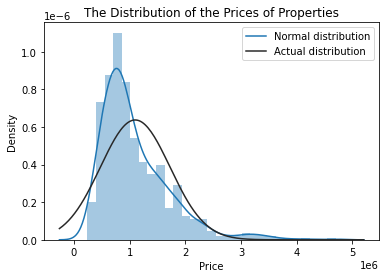

In [114]:
sns.distplot(df.Price, fit=norm)
plt.title("The Distribution of the Prices of Properties")
plt.legend(["Normal distribution", "Actual distribution"])
plt.show()

From the histogram generated above, the distribution of the prices is the blue chart, and the black curve is the normal distribution fitted to the distribution of price. From the histogram, the blue curve and the black cuver have a huge difference. As normality and linear relationship are the key points to be cared to build a linear model, the more like the normal distribution, the better of the transformation.

Therefore, try the log transformation on the price values to normalize the price data.

In [108]:
df.loc[:, "Price"]

0     -0.044403
1     -0.013445
2     -0.013272
3     -0.051037
4     -0.022661
         ...   
715   -0.017625
716   -0.061861
717   -0.041403
718   -0.041843
719   -0.031570
Name: Price, Length: 720, dtype: float64

In [115]:
df.Price.apply(log)

0      13.500800
1      14.617512
2      14.624216
3      13.281075
4      14.268495
         ...    
715    14.457364
716    12.936034
717    13.602317
718    13.587354
719    13.944783
Name: Price, Length: 720, dtype: float64

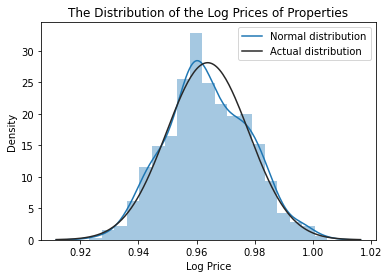

In [119]:
# log transformation
df["Price"] = df.Price.apply(log)
# plot
sns.distplot(df.Price, fit=norm)
plt.title("The Distribution of the Log Prices of Properties")
plt.legend(["Normal distribution", "Actual distribution"])
plt.xlabel("Log Price")
plt.show()

After the log transformation on Price values, the distribution is more likes normal distribution, which means the transformation is meaningful and helpful to build linear model.

## 4.3 Find the best transformations of attributes
As for these attibutes which are `Rooms`, `crime_C_average`, `travel_min_to_CBD` and `Age`, they also need non-linear transformations as same as the `Price`. The linear scales, which are z_score normalization and max-min normalization, are not needed here because the the attributes is for fitting a linear model, which is also linearly. Transforming linearly to the attributes of linear model will not influence the quality of the linear model.



### 4.3.1 Visualize the other attributes

To examine the relationship between the `Price` and each attibutes, use `seaborn.pairplot()` to plot the scatter between them.

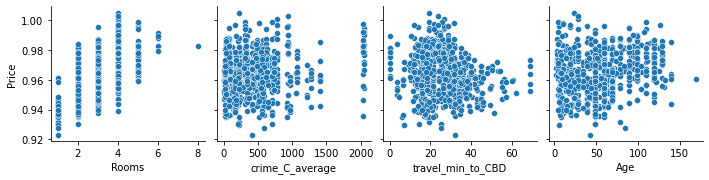

In [120]:
sns.pairplot(df, x_vars=["Rooms","crime_C_average","travel_min_to_CBD","Age"], y_vars=["Price"])
plt.show()

Linear relationship is the key point to build a linear model, but these 4 features do not have significant linear correlations. Therefore, the features should be transformed.

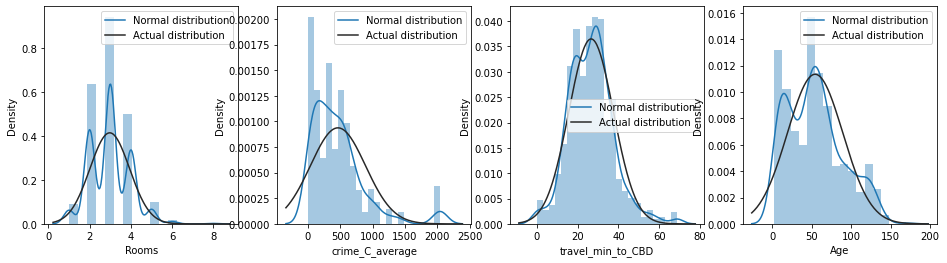

In [121]:
plt.figure(figsize=(16,4))
i = 1
for column in df.columns:
    if column == "Price": continue
    plt.subplot(1,4,i)
    sns.distplot(df[column], rug=False, fit=norm)
    plt.legend(["Normal distribution", "Actual distribution"])
    i += 1

plt.show()

The distriibutions of these attributes should have significant normality. However, from the the output of histograms, the attributes have great differences with normal distribution fitted. Therefore, they need to be transformed.

Then, examine which distribution is the best suitable for each attribute by visualizing them. Using `StandardScaler`, `MinMaxScaler`, `FunctionTransformer` and `PowerTransformer` in `sklearn.preprocessing` library to transform the data for each attributes. (sklearn, 2019)

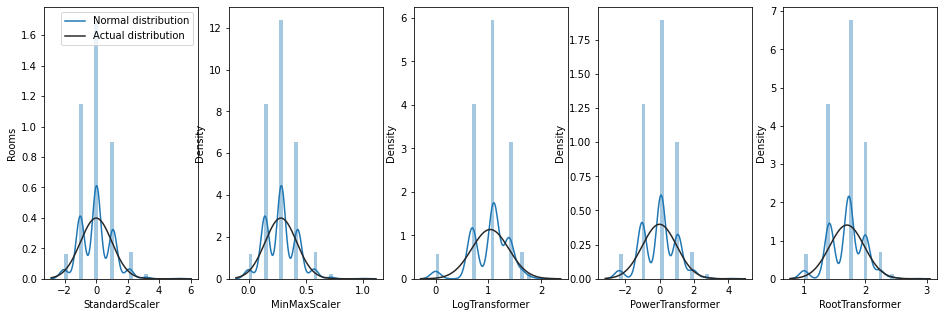

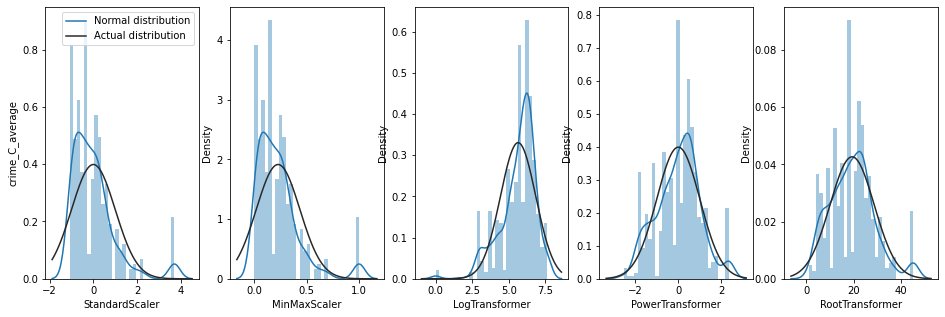

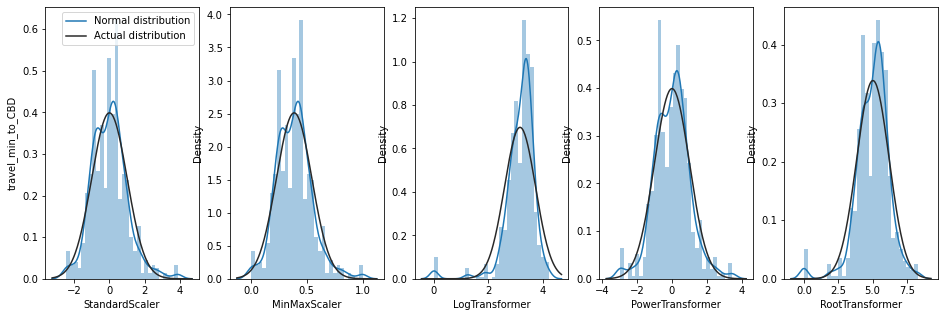

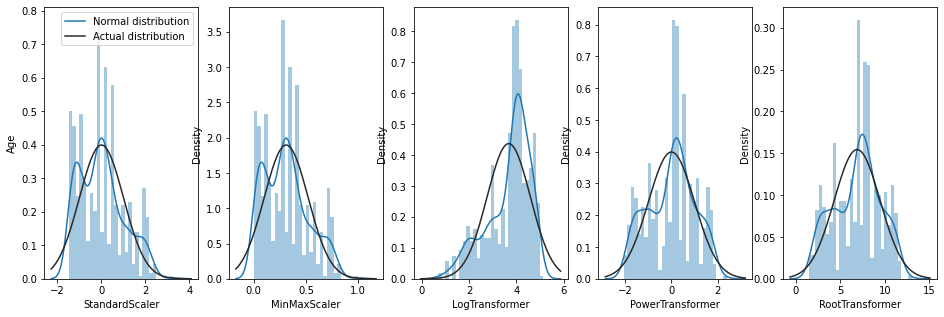

In [122]:
# this function is to convert the 1d-array to 2d-array,
# fitting the requirement of sklearn
def to_2d_list(iterable):
    return [[each] for each in iterable]


# this function is make the log function can be applied safely
def safe_log(x):
    def safe_log_func(x):
        # if the x values is 0, return 0 to avoid error
        if x[0] == 0:
            return 0
        else:
            return log(x)
    return [safe_log_func(each) for each in x if safe_log_func(each) is not None]

# the function is to plot each transformer for one attribute
def display_each_transformer(data_frame, column, bins):
    X = to_2d_list(data_frame[column])
    plt.figure(figsize=(16,5))
    # standard scaler
    plt.subplot(1,5,1)
    sns.distplot(StandardScaler().fit(X).transform(X), bins=bins, fit=norm)
    plt.xlabel("StandardScaler")
    plt.legend(["Normal distribution", "Actual distribution"])
    plt.ylabel(column)
    # min-max scaler
    plt.subplot(1,5,2)
    sns.distplot(MinMaxScaler().fit(X).transform(X), bins=bins, fit=norm)
    plt.xlabel("MinMaxScaler")
    # log transformer
    plt.subplot(1,5,3)
    sns.distplot(FunctionTransformer(safe_log, validate=True).transform(X), bins=bins, fit=norm)
    plt.xlabel("LogTransformer")
    # power transformer
    plt.subplot(1,5,4)
    sns.distplot(PowerTransformer().fit(X).transform(X), bins=bins, fit=norm)
    plt.xlabel("PowerTransformer")
    # root transformer
    plt.subplot(1,5,5)
    sns.distplot(FunctionTransformer(lambda x: x**0.5, validate=True).transform(X), bins=bins, fit=norm)
    plt.xlabel("RootTransformer")
    plt.show()


# apply the functions above
for column in df.columns:
    if column != "Price": 
        display_each_transformer(df, column, 30)

### 4.3.2 Examine the most suitable transformer

From the distribution visualized above, which transformation can transform the distribution as the most similar one to normal distribution can be manually found. 

The first 2 scalers only transform the features linearly, so cannot adjust the distributions to be more similar to normal distribution. This idea has been predicted in the begining of section **4.3**

By comparing each transformer applied to each attribute, the most suitable transformer can be found for each attribute.
- Rooms: log transformer
- crime_C_average: root transformer
- travel_min_to_CBD: power transformer
- Age: power transformer

### 4.3.3 Apply transformations
Then, apply these transformer to these attributes.

In [123]:
# this function is to transform one attribute for given data frame
def transform_for_column(data_frame, column):
    new_df = data_frame.copy()
    # get the transformer selected
    transformer = transformers_dict[column]
    X = to_2d_list(df[column])
    # transform the values
    if type(transformer) is FunctionTransformer:
        new_df[column] = transformer.transform(X)
    else:
        new_df[column] = transformers_dict[column].fit_transform(X=X)
    return new_df

# initialize the transformers
log_transformer = FunctionTransformer(safe_log, validate=True)
power_transformer = PowerTransformer()
root_transformer = FunctionTransformer(lambda x: x**0.5, validate=True)

# build a dictionary to connect the attributes and transformers
transformers_dict = {
    "Rooms": log_transformer,
    "crime_C_average": root_transformer,
    "travel_min_to_CBD": power_transformer,
    "Age": power_transformer
}

# apply the function above
new_df = df.copy()
for column in df.columns:
    if column != "Price":
        new_df = transform_for_column(new_df, column)

new_df

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price
0,0.693147,27.922512,0.410998,-0.983073,0.956568
1,1.386294,23.993055,0.115534,0.777294,0.986645
2,1.386294,8.602325,-0.188121,0.330303,0.986816
3,1.386294,7.393691,0.869247,-0.103733,0.950244
4,1.098612,18.000000,0.797623,0.991268,0.977594
...,...,...,...,...,...
715,1.609438,8.602325,-0.760030,1.746999,0.982529
716,0.000000,31.219652,-0.993374,-1.776301,0.940014
717,1.098612,31.219652,0.505443,0.039138,0.959442
718,1.098612,12.688578,1.055572,0.549554,0.959020


## 4.4 Compare R2 scores

Use the funcions `build_and_test_lm()` defined in previous to check the r2 score of the new dataset after transforming.

```python
# define a function for generate a linear model and the r2 score
def build_and_test_lm(data_frame, seed=None, test_size=0.3):
    # extract the features and the y value
    X = data_frame[["Rooms","crime_C_average","travel_min_to_CBD","Age"]].values
    y = data_frame["Price"].values
    
    # random split the dataset as training data and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)
    # fit the training data
    lm = LinearRegression().fit(X_train, y_train)
    # test the prediction in test data
    y_predict = lm.predict(X_test)
    return r2_score(y_test, y_predict)
```

In [124]:
build_and_test_lm(new_df, 800)

0.5189159104637718

As the larger r2 score is better for the linear model, and the r2 score of new dataset $0.515$ is larger than $0.454$ which is the original dataset r2 score. Therefore, the new dataset after transformations is better, and the data resharping is successful.

# Reference

Beautiful Soup. (2019). Beautiful Soup Documentation — Beautiful Soup 4.4.0 documentation. Retrieved from https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Better education. (2019). VCE School Ranking - 2018. Retrieved from https://bettereducation.com.au/results/vce.aspx

GeoPython (2019). Introduction to Geopandas — GeoPython - AutoGIS 1 documentation. Retrieved from https://automating-gis-processes.github.io/2016/Lesson2-geopandas-basics.html

Google. (2019). Reference  |  Static Transit  |  Google Developers. Retrieved from https://developers.google.com/transit/gtfs/reference#agencytxt

H., Dunn, M., Malyutin, S., Anderson, J., & G, V. (2019). Haversine Formula in Python (Bearing and Distance between two GPS points). Retrieved from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

Python GIS. (2019). Point in Polygon & Intersect — Intro to Python GIS documentation. Retrieved from https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html

seaborn. (2019). seaborn: statistical data visualization — seaborn 0.9.0 documentation. Retrieved from https://seaborn.pydata.org/

sklearn. (2019). 5.3. Preprocessing data — scikit-learn 0.21.3 documentation. Retrieved from https://scikit-learn.org/stable/modules/preprocessing.html